<a href="https://colab.research.google.com/github/santywin/MachinaLearning/blob/main/arboles_de_decision_comprendiendo_nuestro_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import io
from google.colab import files
uploaded = files.upload()

Saving titanic-test.csv to titanic-test.csv


In [3]:
import io
from google.colab import files
uploaded = files.upload()

Saving titanic-train.csv to titanic-train.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [5]:
test_df = pd.read_csv('/content/titanic-test.csv')
train_df = pd.read_csv('/content/titanic-train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


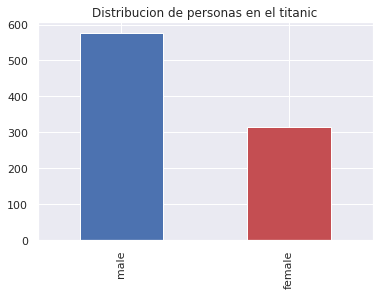

In [10]:
train_df.Sex.value_counts().plot(kind = 'bar', color = ['b', 'r'])
plt.title('Distribucion de personas en el titanic')
plt.show()

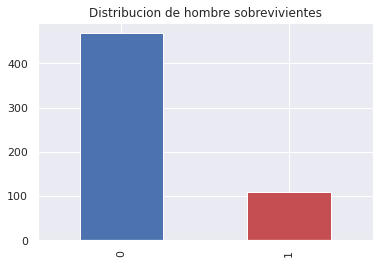

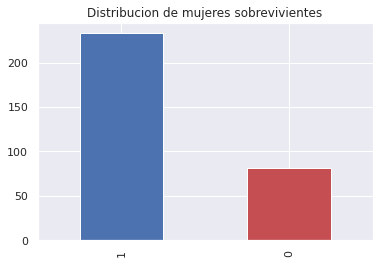

In [9]:
men=train_df.loc[train_df['Sex']=='male']
women=train_df.loc[train_df['Sex']=='female']

men.Survived.value_counts().plot(kind='bar', color=['b','r'])
plt.title('Distribucion de hombre sobrevivientes')
plt.show()

women.Survived.value_counts().plot(kind='bar', color=['b','r'])
plt.title('Distribucion de mujeres sobrevivientes')
plt.show()

In [12]:
train_df[train_df['Survived'] == 1].Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

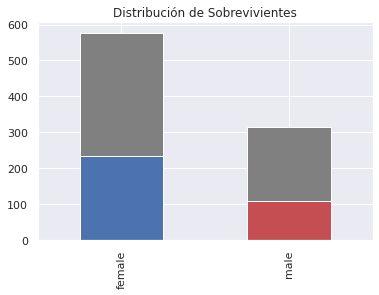

In [13]:
train_df.Sex.value_counts().plot(kind='bar', color=['grey', 'grey'])
train_df[train_df.Survived == 1].Sex.value_counts().plot(kind='bar', color=['b', 'r'])
plt.title('Distribución de Sobrevivientes')
plt.show()

Text(0.5, 1.0, 'Distribucion de sobrevivientes')

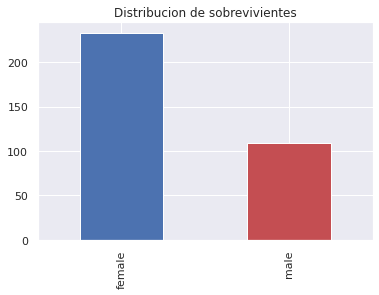

In [16]:
train_df[ train_df['Survived'] == 1 ]['Sex'].value_counts().plot(kind='bar', color=['b','r'])
plt.title('Distribucion de sobrevivientes')